# Plots for Paper

In [1]:
# !pip install -e /home/jovyan/PROJECTS/scale-aware-air-sea --no-deps

In [2]:
# Reproducibility info
import os
os.environ['JUPYTER_IMAGE']

'pangeo/pangeo-notebook:2023.08.29'

In [3]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from scale_aware_air_sea.parameters import get_params
from scale_aware_air_sea.plotting import fill_da
from distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/jbusecke/proxy/8787/status,
Dashboard: /user/jbusecke/proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 125.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41375,Workers: 4
Dashboard: /user/jbusecke/proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 125.81 GiB
Comm: tcp://127.0.0.1:36281,Total threads: 4
Dashboard: /user/jbusecke/proxy/39085/status,Memory: 31.45 GiB
Nanny: tcp://127.0.0.1:41937,


In [4]:
# load global parameters
params = get_params('v1.0.1', test=False)
models = ['CM26', 'CESM']

## Snapshot examples of small scale air sea flux

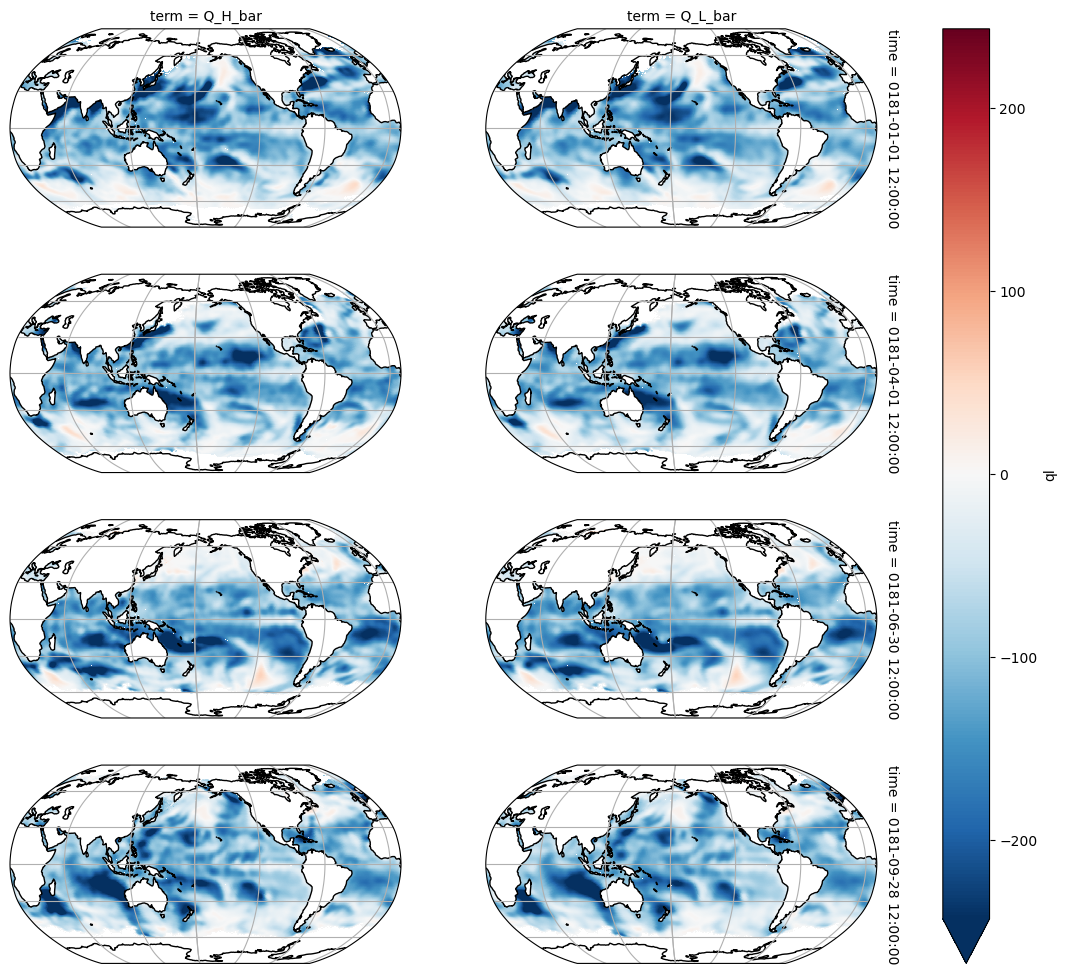

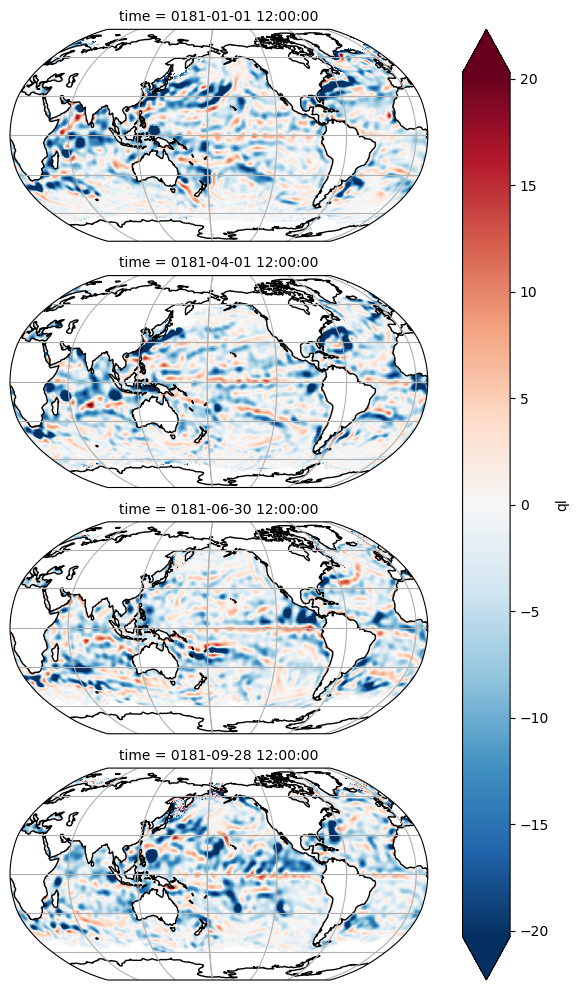

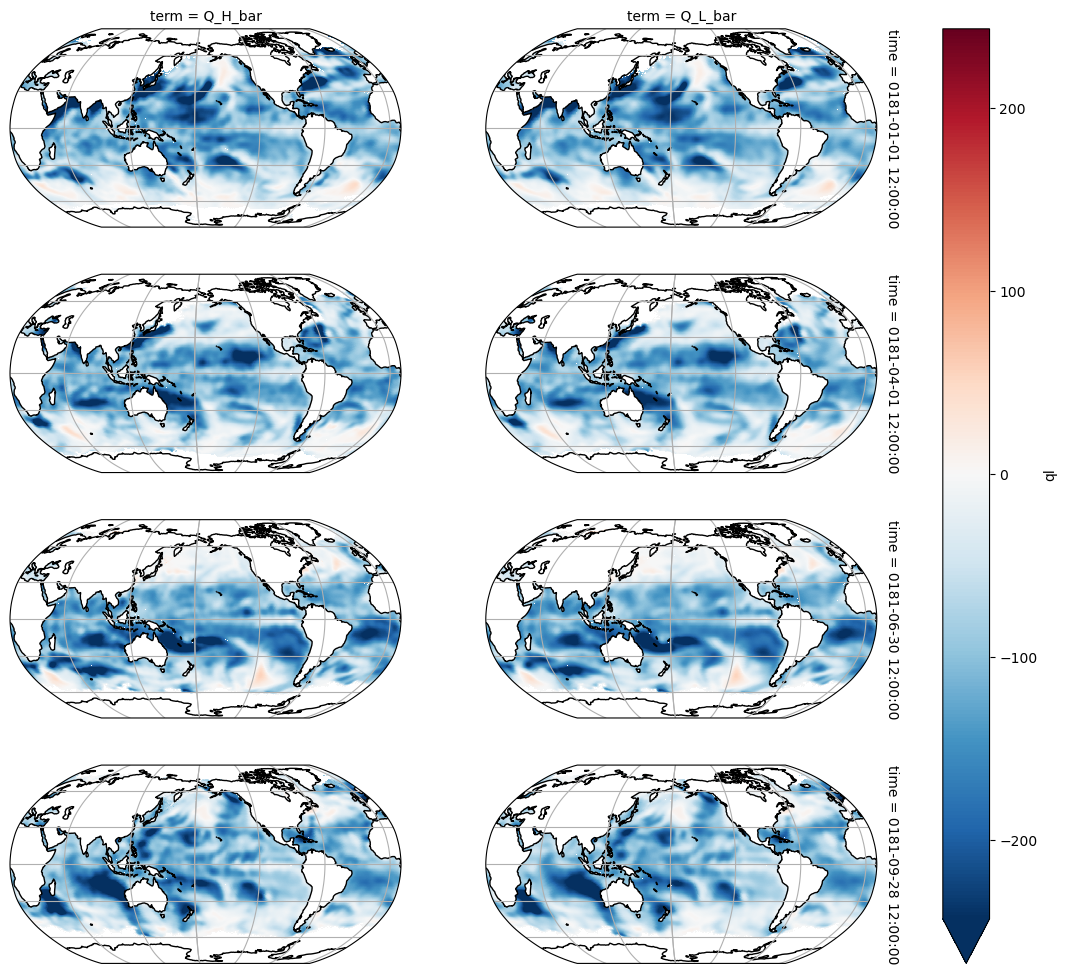

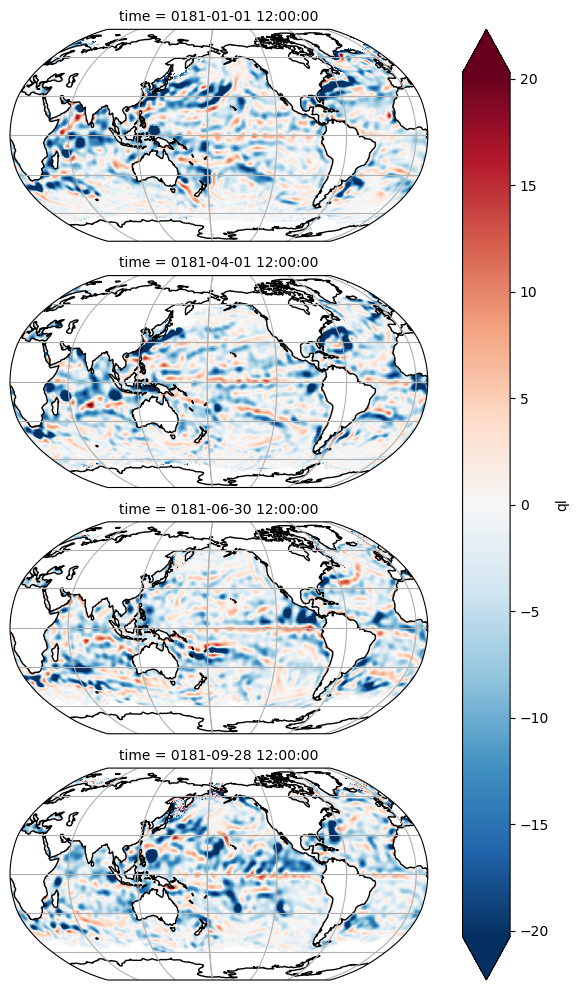

In [7]:
# load the CM26 appendix (daily) output
path = params['paths']['CM26']['results']['filter']['native']['all_terms']
ds = xr.open_dataset(path, engine='zarr', chunks={})
ds
# select a few timesteps, the first algo, and only the Q^** term
da = ds.isel(algo=0, xt_ocean=slice(0,None,5), yt_ocean=slice(0,None,5))

# preload the data for plotting
da = da.load()


# fill nans in the lon/lat arrays for plotting
for co in ['geolat_t', 'geolon_t']:
    da.coords[co] = fill_da(da.coords[co].load())

kwargs = dict(
    subplot_kws={'projection': ccrs.Robinson(190)},
    transform=ccrs.PlateCarree(),
    size=2.5,
    aspect=2.5,
    x='geolon_t',
    y='geolat_t',
)

for va in ['ql', 'qh']:

    large =da['ql'].sel(term=['Q_H_bar', 'Q_L_bar']).plot(
        col='term',
        row='time',
        robust=True,
        **kwargs
    )

    small = da['ql'].sel(term=['Q_star_star']).plot(
        row='time',
        robust=True,
        **kwargs
    )
    
    for p in [large, small]:
        for ax in p.axs.flat:
            ax.coastlines()
            ax.gridlines()
    
    plt.show()